## Predicción con algoritmos de machine learning ##
Se importan las librerias y se carga el dataset

In [1]:
import pydotplus
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier

from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix, precision_score, mean_absolute_error
from sklearn.metrics import recall_score, f1_score, cohen_kappa_score

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz

entrenamiento = pd.read_csv("fined123_tree.csv", sep=';')

Se establecen los limites del dataset

In [2]:
caracteristicas = len(entrenamiento.columns)
caracteristicas

limite = caracteristicas - 1

datos = entrenamiento

entrenamiento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2300 entries, 0 to 2299
Data columns (total 15 columns):
clase                         2300 non-null object
edx.forum.response.created    2300 non-null int64
edx.forum.thread.created      2300 non-null int64
load_video                    2300 non-null int64
openassessment.upload_file    2300 non-null int64
pause_video                   2300 non-null int64
play_video                    2300 non-null int64
problem_check                 2300 non-null int64
problem_graded                2300 non-null int64
problem_show                  2300 non-null int64
seek_video                    2300 non-null int64
seq_goto                      2300 non-null int64
seq_next                      2300 non-null int64
seq_prev                      2300 non-null int64
stop_video                    2300 non-null int64
dtypes: int64(14), object(1)
memory usage: 269.6+ KB


In [3]:
print ("Dataset Lenght:: ", len(entrenamiento))
print ("Dataset Shape:: ", entrenamiento.shape)

Dataset Lenght::  2300
Dataset Shape::  (2300, 15)


Se convierte la columna clase por un valor entendible por la máquina

In [4]:
from sklearn.preprocessing import LabelEncoder

number = LabelEncoder()

entrenamiento['clase']=number.fit_transform(entrenamiento['clase'].astype('str'))

entrenamiento.head(5)

,clase,edx.forum.response.created,edx.forum.thread.created,load_video,openassessment.upload_file,pause_video,play_video,problem_check,problem_graded,problem_show,seek_video,seq_goto,seq_next,seq_prev,stop_video
0,1,0,1,16,1,26,52,12,12,3,18,10,23,9,7
1,1,1,0,19,3,15,302,46,46,10,25,44,7,2,6
2,0,1,0,2,0,0,2,1,1,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,4,0,0,0,3,7,0,0,0


Se establece el dataset de testeo y entrenamiento

In [5]:
from sklearn.preprocessing import LabelEncoder

import numpy as np
from sklearn.model_selection import train_test_split

X = entrenamiento.values[:, 1:limite+1]
Y = entrenamiento.values[:,0]

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.7, random_state = 0)

In [6]:
X_test.shape

(1610, 14)

In [7]:
y_test.shape

(1610,)

Se entrena usando arbol de decisión binario

In [8]:
clf_gini=DecisionTreeClassifier()
decision_tree_binary_classifier = clf_gini.fit(X_train,y_train)
decision_tree_binary_classifier

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [9]:
clf_entropy=DecisionTreeClassifier(criterion = "entropy")
decision_tree_binary_classifier = clf_entropy.fit(X_train,y_train)
decision_tree_binary_classifier

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [10]:
feats = entrenamiento.columns.values.tolist()
del feats[0]
feats

['edx.forum.response.created',
 'edx.forum.thread.created',
 'load_video',
 'openassessment.upload_file',
 'pause_video',
 'play_video',
 'problem_check',
 'problem_graded',
 'problem_show',
 'seek_video',
 'seq_goto',
 'seq_next',
 'seq_prev',
 'stop_video']

Se muestra la correlación entre las caracteristicas

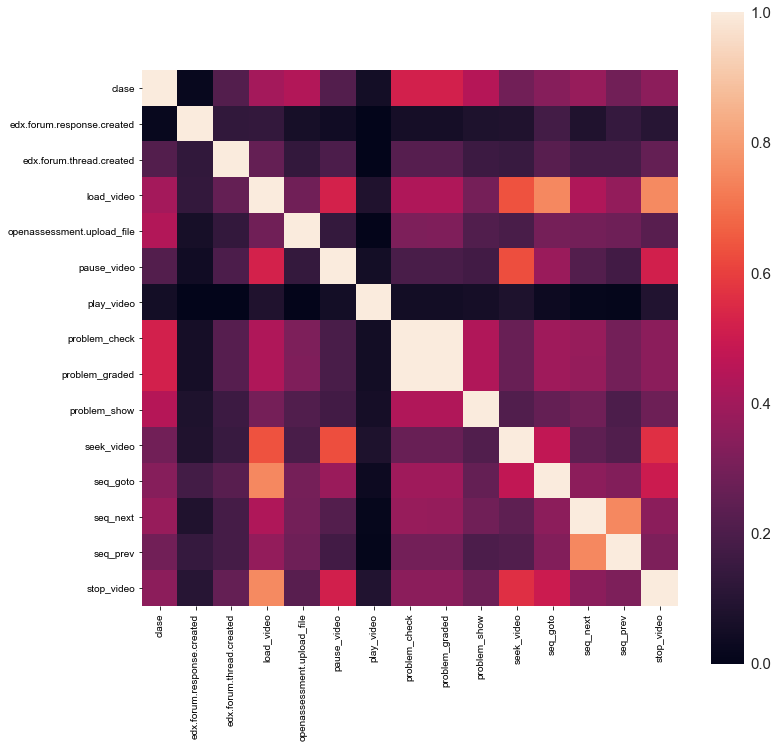

In [11]:
%matplotlib inline
import seaborn as sns

fig, ax = plt.subplots(figsize=(12,12))

corr = entrenamiento.corr()
sns.set(font_scale=1.5)
sns.heatmap(corr, annot = False,
            cbar=True,
            square=True,
            fmt='.2f',
            annot_kws={'size':15},
            yticklabels=corr,
            xticklabels=corr,
            ax=ax)
plt.show()

Se crea el árbol binario de decisión 

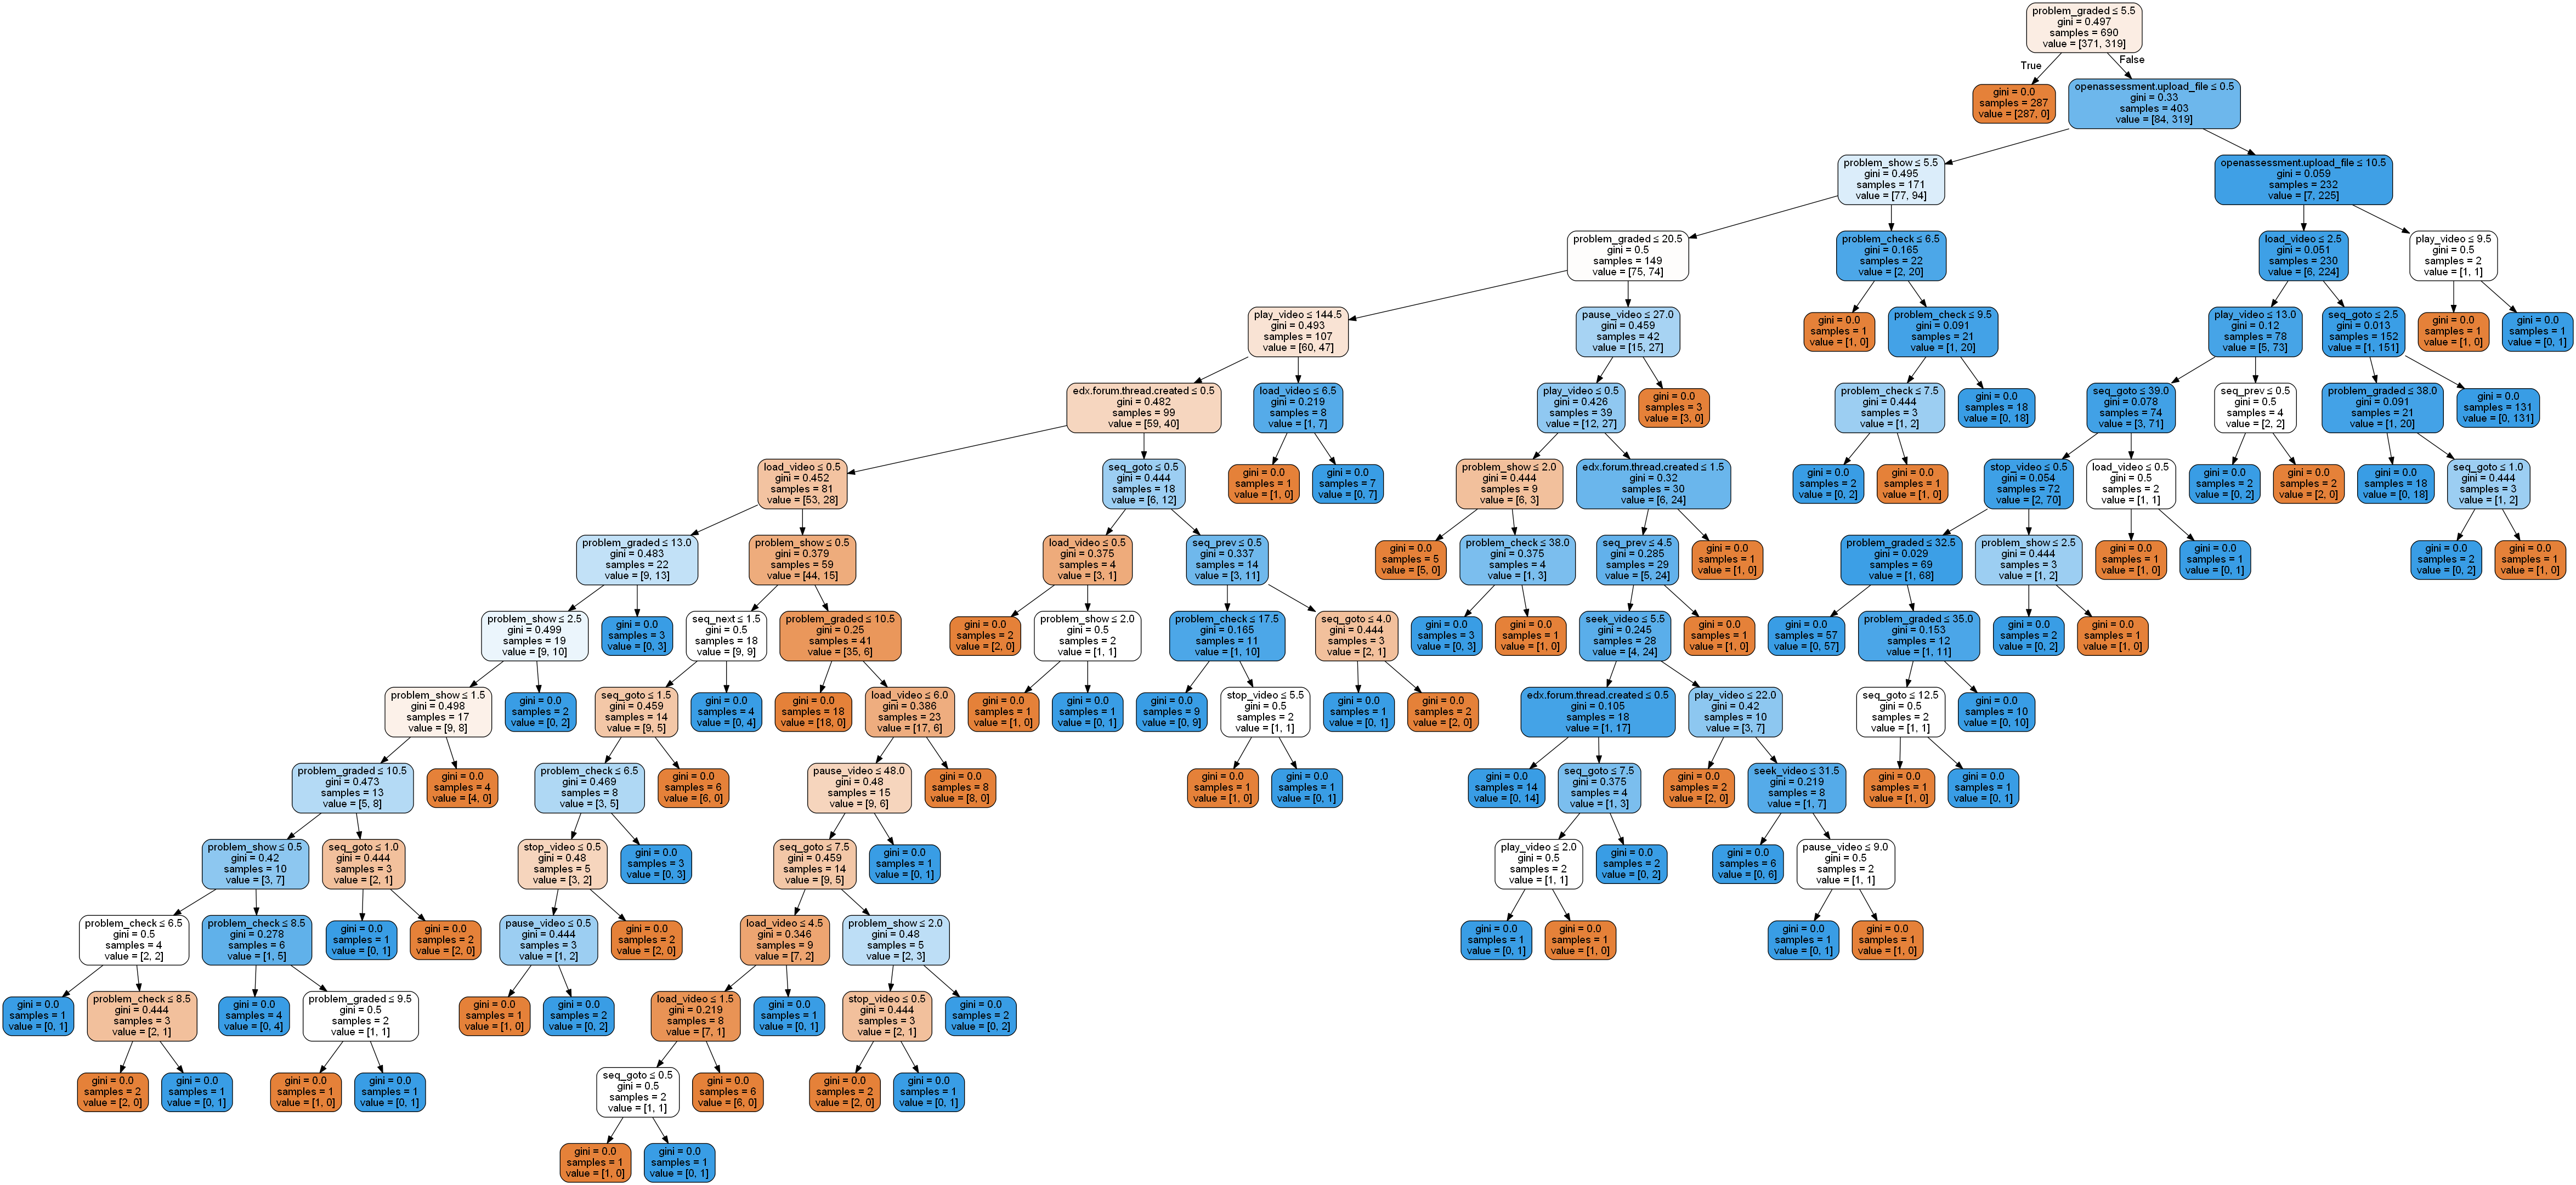

In [12]:
#draw_tree(clf_gini, feats)
dot_data = StringIO()
export_graphviz(clf_gini, out_file=dot_data,  
                filled=True, rounded=True,
                feature_names=feats,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Se realizan las predicciones usando lo aprendido por el modelo usando las dos opciones validas de entrenamiento del arbol de decisión

In [13]:
y_pred = clf_gini.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [14]:
y_pred_en = clf_entropy.predict(X_test)
y_pred_en

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [15]:
print ("Accuracy is ", accuracy_score(y_test,y_pred)*100)

Accuracy is  83.60248447204968


In [16]:
print ("Accuracy is ", accuracy_score(y_test,y_pred_en)*100)

Accuracy is  85.03105590062113


In [17]:
# Confusion matrix
confusion_matrix(y_test, y_pred.round())

array([[749, 127],
       [137, 597]], dtype=int64)

Se esta trabajando con 5687 registros

In [18]:
precision_score(y_test, y_pred, average='micro')

0.8360248447204969

In [19]:
recall_score(y_test, y_pred.round(), average='micro')

0.8360248447204969

In [20]:
mean_absolute_error(y_test, y_pred.round())

0.1639751552795031

Se usa la libreria sklearn para mostrar las cinco caracteristicas mas relevantes

In [21]:
#exctract indicies of most important five features
index_top5 = np.argsort(clf_gini.feature_importances_)[-5:][::-1]

#use above indicies to get most important features
top_5 = entrenamiento.columns[index_top5]

#print out feature and importance
print ("\033[1m"+"Caracteristicas mas importantes dentro del modelo"+"\033[0m\n")

for i, feature in enumerate(top_5):
    print('{}) {}: {:.3f}'.format(i+1, top_5[i], clf_gini.feature_importances_[index_top5[i]]))

Caracteristicas mas importantes dentro del modelo

1) problem_check: 0.636
2) load_video: 0.104
3) problem_graded: 0.057
4) seek_video: 0.037
5) pause_video: 0.036


In [22]:
print("Feature importance:\n{}".format(clf_gini.feature_importances_))

Feature importance:
[0.         0.0138404  0.03207943 0.10389646 0.01683501 0.03600482
 0.02906715 0.63624709 0.05656507 0.00442587 0.03740576 0.00749599
 0.01452158 0.01161536]


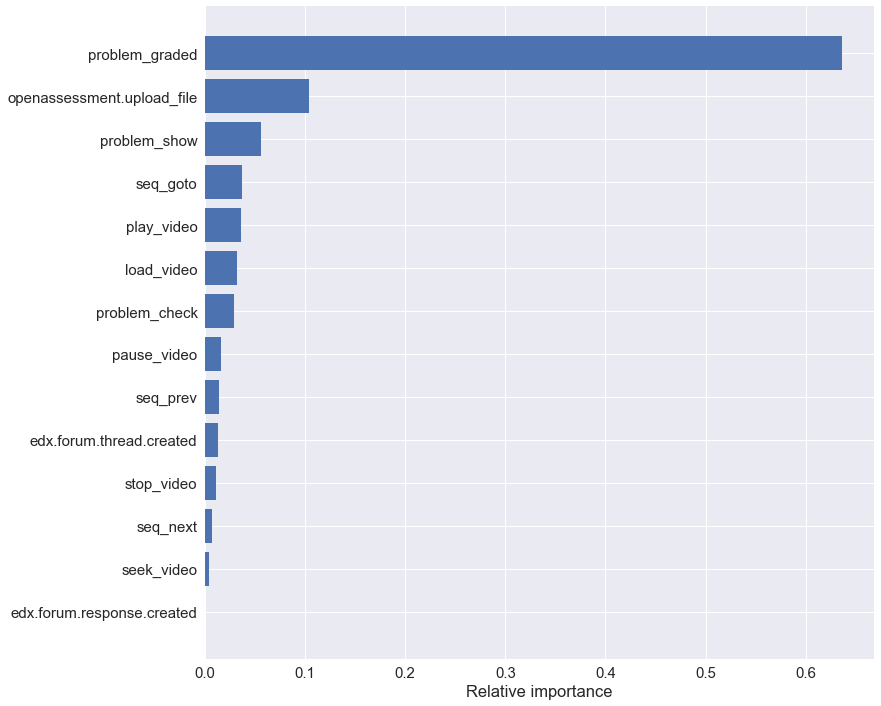

In [23]:
indices = np.argsort(clf_gini.feature_importances_)
names=X.shape[1]
plt.subplots(figsize=(12,12))
plt.barh(np.arange((names)), clf_gini.feature_importances_[indices])
plt.yticks(np.arange((names)) , np.array(feats)[indices])
_ = plt.xlabel('Relative importance')

Se crean distintos algoritmos obteniendo sus valores de precisión para determinar el mejor modelo predictivo

In [24]:
performance = {'KNN':0, 'Support Vector Machines':0, 'Random Forest':0, 'Decission Tree':0}

In [25]:
# Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y1_predict = dtc.predict(X_test)
performance['Decission Tree'] = accuracy_score(y_test, y1_predict)
accuracy_score(y_test, y1_predict)

0.8304347826086956

In [26]:
# Random Forest Classifier# Random 
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y2_predict = rfc.predict(X_test)
performance['Random Forest'] = accuracy_score(y_test, y2_predict)
accuracy_score(y_test, y2_predict)

0.8515527950310559

In [27]:
# Support Vector Machine
supportvm = svm.SVC()
supportvm.fit(X_train, y_train)

y3_predict = supportvm.predict(X_test)
performance['Support Vector Machines'] = accuracy_score(y_test, y3_predict)
accuracy_score(y_test, y3_predict)

0.8211180124223603

In [28]:
# KNeighbors Classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y4_predict = knn.predict(X_test)
performance['KNN'] = accuracy_score(y_test, y4_predict)
accuracy_score(y_test, y4_predict)

0.8540372670807453

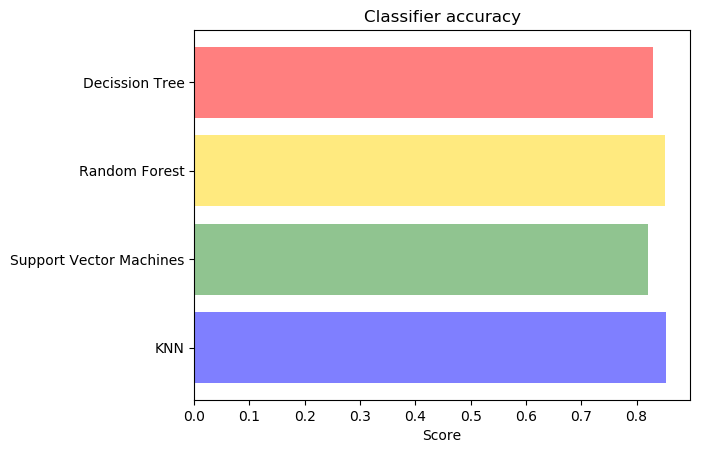

In [29]:
import numpy as np
plt.rcdefaults()
plt.figure(facecolor='white')

y_pos = np.arange(len(performance.keys()))
   
clr = ('blue', 'forestgreen', 'gold', 'red', 'purple', 'yellow', 'black','green')
    
h = plt.barh(y_pos, list(performance.values()), align='center',alpha=0.5, color=clr)
plt.yticks(y_pos, performance.keys())
plt.xlabel('Score')
plt.title('Classifier accuracy')


plt.show()
